# Spatial Analysis

In this notebook I will examine star formation patterns as they relate to the surrounding gaseous environment, as well as how stars of particular photometry related to each other in space.

In [21]:
# Standard imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pylab import *
import scipy as scipy
from scipy import integrate
from scipy import stats
import itertools
from astropy.io import fits

## Field star photometry without applying any color / (NUV)o thresholds to data

In [2]:
# Original files
SMC_daofind_braun_id_coords_color_nuv = np.genfromtxt('SMC_daofind_braun_id_coords_color_nuv')

# Uncorrected variables
id_number_nocorr = SMC_daofind_braun_id_coords_color_nuv[:,0]
ra_nocorr = SMC_daofind_braun_id_coords_color_nuv[:,1]
dec_nocorr = SMC_daofind_braun_id_coords_color_nuv[:,2]
nuv_v_nocorr = SMC_daofind_braun_id_coords_color_nuv[:,3]
nuv_nocorr = SMC_daofind_braun_id_coords_color_nuv[:,4]

# Corrected variables (including absolute mag correction and extinction correction)
id_number_corr = id_number_nocorr
ra_corr = ra_nocorr
dec_corr = dec_nocorr
nuv_v_corr = nuv_v_nocorr - 0.26
nuv_corr = nuv_nocorr - 18.7 - 0.42
v_corr = nuv_corr - nuv_v_corr # The v extinction correction of - 0.16 is "built in" to the defintion of the nuv_v color.

# Brightness cut
id_number_cut = id_number_corr[nuv_corr <= 0.45]
ra_cut = ra_corr[nuv_corr <= 0.45]
dec_cut = dec_corr[nuv_corr <= 0.45]
nuv_v_cut = nuv_v_corr[nuv_corr <= 0.45]
nuv_cut = nuv_corr[nuv_corr <= 0.45]
v_cut = v_corr[nuv_corr <= 0.45]

# Correction between GALEX catalog vs. daophot
id_number = id_number_cut
ra = ra_cut
dec = dec_cut
nuv_v = nuv_v_cut + 0.6
nuv = nuv_cut + 0.6
v = v_cut

print(nuv[0:5])

[ 0.417 -0.103 -0.7    0.387 -1.564]


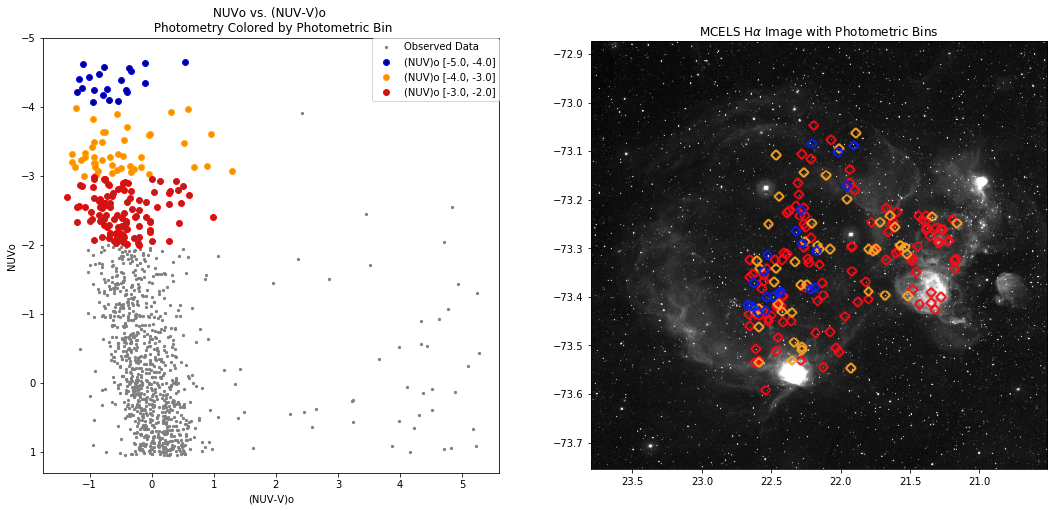

In [141]:
# Create bins based on photometric limits

# Brightest bin
bin1 = np.logical_and(nuv <= -4.0, nuv_v <= 2)
ra_bin1 = ra[bin1]
dec_bin1 = dec[bin1]
nuv_v_bin1 = nuv_v[bin1]
nuv_bin1 = nuv[bin1]

# Middle bin
bin2 = np.logical_and(np.logical_and(nuv > -4.0, nuv <= -3.0), nuv_v <= 2)
ra_bin2 = ra[bin2]
dec_bin2 = dec[bin2]
nuv_v_bin2 = nuv_v[bin2]
nuv_bin2 = nuv[bin2]

# Faintest bin
bin3 = np.logical_and(np.logical_and(nuv > -3.0, nuv <= -2.0), nuv_v <= 2)
ra_bin3 = ra[bin3]
dec_bin3 = dec[bin3]
nuv_v_bin3 = nuv_v[bin3]
nuv_bin3 = nuv[bin3]

# Save photometric bins as files later visualization
np.savetxt('July25_photometric_bin1.txt', np.c_[ra_bin1, dec_bin1, nuv_v_bin1, nuv_bin1])
np.savetxt('July25_photometric_bin2.txt', np.c_[ra_bin2, dec_bin2, nuv_v_bin2, nuv_bin2])
np.savetxt('July25_photometric_bin3.txt', np.c_[ra_bin3, dec_bin3, nuv_v_bin3, nuv_bin3])


# Plot (NUV)o vs. (NUV-V)o CMD with photometric bins colored
plt.figure(figsize=(18,8))

# plt.subplot(311)
plt.subplot(121)
plt.scatter(nuv_v, nuv, color='grey', label="Observed Data", s=5, marker="o")
plt.scatter(nuv_v_bin1, nuv_bin1, color='navy', edgecolor='blue', s=35, marker="o", label='(NUV)o [-5.0, -4.0]')
plt.scatter(nuv_v_bin2, nuv_bin2, color='darkorange', edgecolor='orange', s=35, marker="o", label='(NUV)o [-4.0, -3.0]')
plt.scatter(nuv_v_bin3, nuv_bin3, color='firebrick', edgecolor='red', s=35, marker="o", label='(NUV)o [-3.0, -2.0]')

plt.xlabel('(NUV-V)o')
plt.ylabel('NUVo')
plt.title('NUVo vs. (NUV-V)o \n Photometry Colored by Photometric Bin')
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0., prop={'size':10})
plt.ylim(1.3,-5.0)
plt.xlim(-1.75, 5.6)

# MCELS image with photometric bins overlayed
im = plt.imread('MCELS_4.png')
# plt.subplot(313)
plt.subplot(122)
plt.imshow(im, extent=[23.8,20.51,-73.755,-72.874], aspect=3.5)
plt.title(r'MCELS H$\alpha$ Image with Photometric Bins')


plt.show()